In [1]:
import geopandas as gpd
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd
import matplotlib.patheffects as path_effects
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import fiona
from shapely.geometry import Point

## Import files (and convert to appropriate CRS if applicable)

In [4]:
waste = gpd.read_file("Infrastructure layers/wastewater_treatment_plants.gpkg")
LGAvic = gpd.read_file("Infrastructure layers/LGAVIC_Zonal.gpkg")
LGAsa = gpd.read_file("Infrastructure layers/LGASAZonal.gpkg")
powerlines = gpd.read_file("Infrastructure layers/Aus_powerlines.gpkg")
translines = gpd.read_file("Infrastructure layers/Aus_Transmission_Lines.gpkg")
major_power = gpd.read_file("Infrastructure layers/Aus_MajorPower_Stations.gpkg")
substations = gpd.read_file("Infrastructure layers/Aus_Transmission_Substations.gpkg")
shapefile = gpd.read_file("Aus_Shapefile/STE_2021_AUST_GDA2020.shp")
colac_lin = gpd.read_file("NVP Locations/colac_lineament.gpkg")
PDmatrix = gpd.read_file("NVP Locations/P_D_matrix.gpkg")
watersupply = gpd.read_file("Infrastructure layers/Aus_Water_Reserves.gpkg")
exchange = gpd.read_file("Infrastructure layers/Aus_Telephone_Exchanges.gpkg")
AusAirports = gpd.read_file("Infrastructure layers/Aus_Airports.gpkg")
AusRunways = gpd.read_file("Infrastructure layers/Aus_Runways.gpkg")
Roads = gpd.read_file("Infrastructure layers/Aus_MajorRoads.gpkg")
Rails = gpd.read_file("Infrastructure layers/Aus_Railways.gpkg")
Bridges = gpd.read_file("Infrastructure layers/Aus_Railway_Bridges.gpkg")

In [8]:
shapefile=shapefile.to_crs(LGAvic.crs)
powerlines=powerlines.to_crs(LGAvic.crs)
translines=translines.to_crs(LGAvic.crs)
major_power=major_power.to_crs(LGAvic.crs)
substations = substations.to_crs(LGAvic.crs)
Bridges = Bridges.to_crs(LGAvic.crs)
watersupply = watersupply.to_crs(watersupply.crs)
PDmatrix = PDmatrix.to_crs(LGAvic.crs)
colac_lin = colac_lin.to_crs(LGAvic.crs)
AusAirports = AusAirports.to_crs(LGAvic.crs)
AusRunways = AusRunways.to_crs(LGAvic.crs)
exchange = exchange.to_crs(LGAvic.crs)
Roads = Roads.to_crs(LGAvic.crs)
Rails = Rails.to_crs(LGAvic.crs)

## Create handles for legends

### Power

In [10]:
major_proxy = Line2D([], [], marker='*', linestyle='None', color='#00be3f',
                    markerfacecolor='#00be3f', markersize=8, label='Major Power Stations')
sub_proxy = Line2D([], [], marker='*', linestyle='None', color='#a1ff5d',
                    markerfacecolor='#a1ff5d', markersize=8, label='Power Substations')
powerlines_proxy =  Line2D([], [], linestyle='-', color='purple', alpha=0.6, linewidth=4, label='Powerlines')
translines_proxy =  Line2D([], [], linestyle='-', color='pink', alpha=1, linewidth=4, label='Transmission Lines')
pd_proxy = Line2D([], [], marker='^', linestyle='None', color='orange',
                    markerfacecolor='orange', markeredgecolor='gray', markersize=8, label='Eruptive Centres')
powerhandles = [major_proxy, sub_proxy, pd_proxy, powerlines_proxy, translines_proxy]

### Water

In [23]:
waste_proxy = Line2D([], [], marker='D', linestyle='None', color='blue',
                       markerfacecolor='blue', markersize=8, label='Wastewater Treatment Plants')

ws_proxy = Patch(facecolor='#75aefd', edgecolor='#003c8f', label='Water Supply Reserves')

pd_proxy = Line2D([], [], marker='^', linestyle='None', color='orange',
                    markerfacecolor='orange', markeredgecolor='gray', markersize=8, label='Eruptive Centres')

waterhandles = [waste_proxy, ws_proxy, pd_proxy]

### Airports

In [12]:
airport_proxy = Line2D([], [], marker='d', linestyle='None', color='blue',
                       markerfacecolor='blue', markersize=8, label='Airports')
runway_proxy =  Line2D([], [], linestyle='-', color='red', linewidth=4, label='Runways')
pd_proxy = Line2D([], [], marker='^', linestyle='None', color='orange',
                    markerfacecolor='orange', markeredgecolor='gray', markersize=8, label='Eruptive Centres')
airhandles = [airport_proxy, runway_proxy, pd_proxy]

### Roads and Rails

In [13]:
rails_proxy =  Line2D([], [], linestyle='-', color='red', linewidth=4, label='Railways')
roads_proxy =  Line2D([], [], linestyle='-', color='blue', linewidth=4, label='Major Highway')
bridges_proxy = Line2D([], [], marker='X', linestyle='None', color='#1a9641',
                    markerfacecolor='#1a9641', markersize=8, label='Railway Bridges')
pd_proxy = Line2D([], [], marker='^', linestyle='None', color='orange',
                    markerfacecolor='orange', markeredgecolor='gray', markersize=8, label='Eruptive Centres')
groundhandles = [rails_proxy, roads_proxy, bridges_proxy, pd_proxy]

## Define Plot functions

### Victoria Labels

In [44]:
def Victoria_Labels(ax, title=None, xlim=(140, 145.5), ylim=(-39, -36.5), aspect=4/3):

    ax.scatter(144.97806, -37.8240, color='black', zorder=5, s=50) 
    ax.scatter(140.78377, -37.82668, color='black', zorder=5, s=50)
    

    melbourne = ax.annotate(
        'Melbourne',  
        xy=(144.97806, -36.7240),
        xytext=(144.98, -37.75),
        fontsize=8,
        color='black',
        ha="center",
        zorder=5
    )
    melbourne.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])
    
    mt_gambier = ax.annotate(
        "Mt Gambier",
        xy=(140.7659, -37.8414),
        xytext=(140.7, -37.78),
        fontsize=8,
        color="black",
        zorder=5
    )
    mt_gambier.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])

    sa = ax.annotate(
        "South Australia",
        xy=(140.6, -37.0648),
        xytext=(140.82, -37.3648),
        rotation=270,
        fontsize=8,
        color='grey'
    )
    sa.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])

    vic = ax.annotate(
        "Victoria",
        xy=(140.2, -37.0648),
        xytext=(141.04, -37.14),
        rotation=90,
        fontsize=8,
        color='grey'
    )
    vic.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])

    colac = ax.annotate(
        "Colac Lineament",
        xy=(140.7659, -37.8414),
        xytext=(141.52, -38.7),
        fontsize=9,
        rotation=5.5,
        color="black",
        zorder=4
    )
    colac.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])

    # Set axes styling
    ax.set_facecolor('#e0f4ff')
    if title:
        ax.set_title(title, fontsize=16)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect(aspect, adjustable='box')
    
    

### Power

In [39]:
def plot_power(ax):
    colac_lin.plot(ax=ax, color='black', zorder=5)
    LGAvic.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
    LGAsa.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
    shapefile.plot(ax=ax, color='white',edgecolor='black', zorder=0)
    major_power.plot(ax=ax, color = '#00be3f', alpha=1, marker='*', zorder=5, markersize=90, label='Major Power Stations')
    substations.plot(ax=ax, color = '#a1ff5d', alpha=1, marker='*', zorder=4, markersize=50, label='Power Substations')
    PDmatrix.plot(ax=ax, color='orange', edgecolor='gray', markersize=15, marker='^', zorder=5, alpha=0.5, label = "Eruptive Centres")
    powerlines.plot(ax=ax, color='purple', alpha=0.6, zorder=4, label='Powerlines')
    translines.plot(ax=ax, color='pink',alpha=1, zorder=3, label='Transmission Lines')



    ax.set_facecolor('#e0f4ff')
    ax.set_title("Power", fontsize=16)
    leg =  ax.legend(handles=powerhandles, fontsize=9, frameon=True,loc='center',bbox_to_anchor=(0.5,-0.25), bbox_transform=ax.transAxes, ncol=3)

    ax.set_xlim(140, 145.5)
    ax.set_ylim(-39,-36.5)
    ax.set_aspect(4/3, adjustable='box')

### Water

In [40]:
def plot_water(ax):
    colac_lin.plot(ax=ax, color='black', zorder=4)
    LGAvic.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
    LGAsa.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
    waste.plot(ax=ax, color='#003c8f', alpha = 0.6, marker='D', zorder=4)
    shapefile.plot(ax=ax, color='white',edgecolor='black', zorder=0)
    watersupply.plot(ax=ax, color='#75aefd', edgecolor = '#003c8f', zorder=3)
    PDmatrix.plot(ax=ax, color='orange', edgecolor='gray', markersize=15, marker='^', zorder=2, alpha=0.6)


    ax.legend(handles=waterhandles, frameon=True,loc='center',bbox_to_anchor=(0.5,-0.25), bbox_transform=ax.transAxes, ncol=2)
    ax.set_title("Water", fontsize=16)
    ax.set_facecolor('#e0f4ff')
    ax.set_xlim(140, 145.5)
    ax.set_ylim(-39,-36.5)
    ax.set_aspect(4/3, adjustable='box')

### Airports

In [41]:
def plot_airport(ax):
    colac_lin.plot(ax=ax, color='black', zorder=2)
    LGAvic.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
    LGAsa.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
    AusAirports.plot(ax=ax, marker="d", markersize = 70, zorder=4, label="Airports")
    AusRunways.plot(ax=ax, color='red', linewidth=4, zorder=5, label="Runways")
    shapefile.plot(ax=ax, color='white',edgecolor='black', zorder=0)
    PDmatrix.plot(ax=ax, color='orange', edgecolor='gray', marker='^', markersize=15, zorder=2, alpha=0.6)


    ax.legend(handles=airhandles, frameon=True,loc='center',bbox_to_anchor=(0.5,-0.3), ncol=2)
        
    ax.set_title("Airports", fontsize=16)
    ax.set_facecolor('#e0f4ff')
    ax.set_xlim(140, 145.5)
    ax.set_ylim(-39,-36.5)
    ax.set_aspect(4/3, adjustable='box')

### Roads and Rails

In [42]:
def plot_ground(ax):
    colac_lin.plot(ax=ax, color='black', zorder=2)
    LGAvic.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
    LGAsa.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
    Roads.plot(ax=ax, color='blue', linewidth=2, zorder=5, label="Major Highways")
    Rails.plot(ax=ax, color='red', linewidth=2, zorder=5, label="Rails")
    Bridges.plot(ax=ax, color='#1a9641', marker='x', zorder=6)
    shapefile.plot(ax=ax, color='white',edgecolor='black', zorder=0)
    PDmatrix.plot(ax=ax, color='orange', edgecolor='gray', marker='^', markersize=15, zorder=2, alpha=0.6)

    ax.legend(handles=groundhandles, frameon=True,loc='center',bbox_to_anchor=(0.5,-0.3), ncol=2)
    ax.set_title("Roads and Railways", fontsize=16)
    ax.set_facecolor('#e0f4ff')
    ax.set_xlim(140, 145.5)
    ax.set_ylim(-39,-36.5)
    ax.set_aspect(4/3, adjustable='box')

## Create Subplot

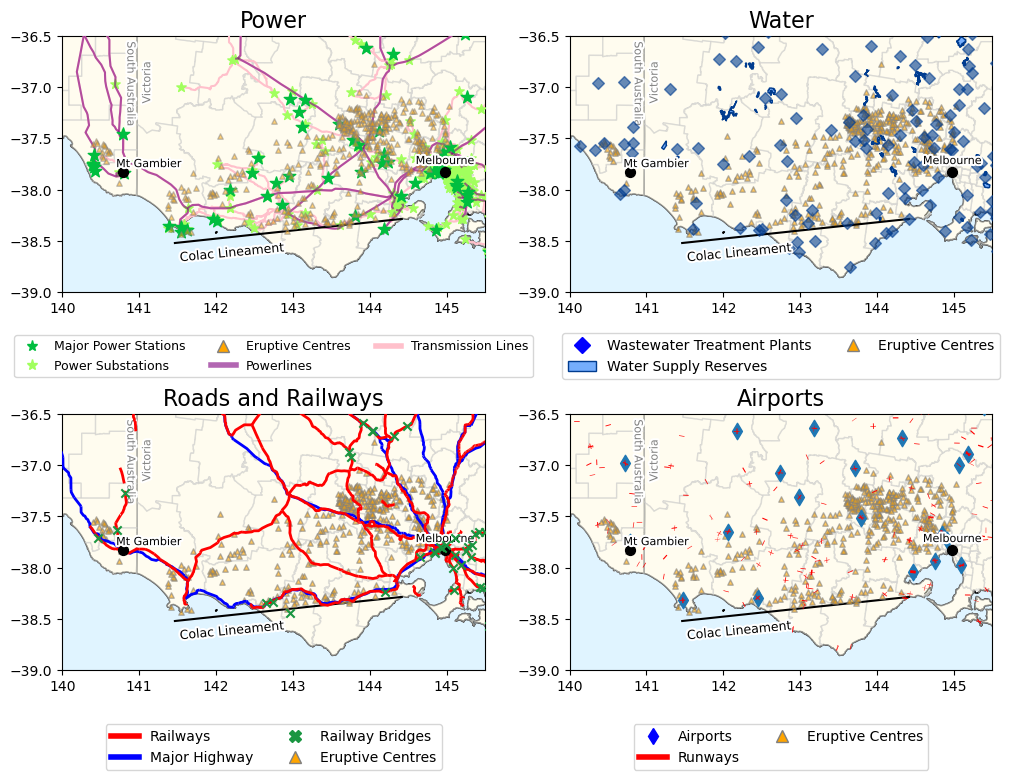

In [45]:
fig, axs = plt.subplots(2,2, figsize=[12,9])


plot_power(axs[0,0])
plot_water(axs[0,1])
plot_ground(axs[1,0])
plot_airport(axs[1,1])

for ax in axs.flatten():
    Victoria_Labels(ax) 

plt.savefig("multi_map.png")